# Convolutional Neural Networks (CNN)

- Step 1: Load data
    - Fashion MNIST: Like MNIST but with clothing images, 28x28 grayscale images, labels: t-shirt, shoes, pants, etc.
    - CIFAR-10: 32x32x3 color, labels: automobile, frog, horse, cat, dog...
    - Both of them within tensorflow: `tf.keras.datasets.fashion_mnist.load_data()` & `tf.keras.datasets.cifar10.load_data()`
- Step 2: Build model
    - CNNs in this case
    - Funcional API: better way of creating models, Keras convention
- Step 3: Train the model
- Step 4: Evaluate the model
- Step 5: Make predictions
- Bonus: Data augmentation

In [164]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# more convinient:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout # regular CNN
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, BatchNormalization # advanced CNN
from tensorflow.keras.models import Model

## Fashion MNIST

In [119]:
# downlaod data
data = tf.keras.datasets.fashion_mnist.load_data()

In [120]:
# extract data
(X_train, y_train), (X_test, y_test) = data

In [121]:
# convert range from (0, 255) to (0, 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [122]:
print(X_train.shape)

(60000, 28, 28)


In [123]:
# increase another dimension, as this is what the CNN expects
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
print(X_train.shape)

(60000, 28, 28, 1)


In [124]:
# store number of possible classes
K = len(set(y_train))
print('Number of possible classes', K)

Number of possible classes 10


### CNN Model

In [125]:
# build model
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [126]:
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [127]:
# fit model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5234 - accuracy: 0.8066 - val_loss: 0.4269 - val_accuracy: 0.8427
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3623 - accuracy: 0.8638 - val_loss: 0.3501 - val_accuracy: 0.8708
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3124 - accuracy: 0.8828 - val_loss: 0.3092 - val_accuracy: 0.8869
Epoch 4/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2795 - accuracy: 0.8943 - val_loss: 0.3108 - val_accuracy: 0.8911
Epoch 5/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2522 - accuracy: 0.9050 - val_loss: 0.2859 - val_accuracy: 0.8968
Epoch 6/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2299 - accuracy: 0.9126 - val_loss: 0.2948 - val_accuracy: 0.8950
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2142 - accuracy: 0.9183 - val_loss: 0.2850 - val_ac

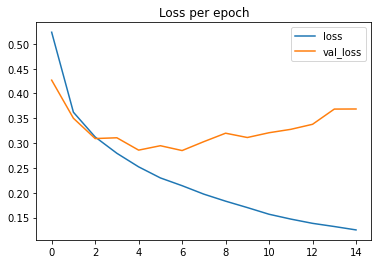

In [128]:
# plot loss per epoch
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('Loss per epoch')
plt.legend()

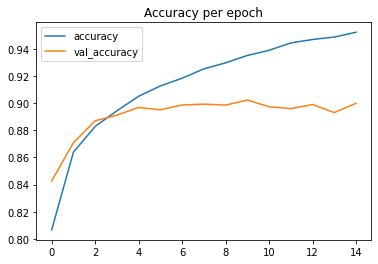

In [129]:
# plot accuracy per epoch
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy per epoch')
plt.legend()

### Analyze Model

In [130]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3688 - accuracy: 0.8998


[0.3687654733657837, 0.8998000025749207]

In [131]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

In [132]:
# create a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [133]:
# Calculate confusion matrix
y_hat = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_hat)

In [134]:
# classes label
classes = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

Confusion matrix, without normalization
[[886   0  20  16   3   1  71   0   3   0]
 [  4 975   1  15   2   0   1   0   2   0]
 [ 14   0 883  17  35   0  49   0   2   0]
 [ 20   4  13 923  16   0  23   0   1   0]
 [  1   0  89  38 793   0  79   0   0   0]
 [  1   0   0   1   0 971   0  15   1  11]
 [128   0  87  24  73   0 676   0  12   0]
 [  0   0   0   0   0   7   0 946   0  47]
 [  1   0   3   4   2   2   7   4 977   0]
 [  1   0   0   1   0   4   0  26   0 968]]


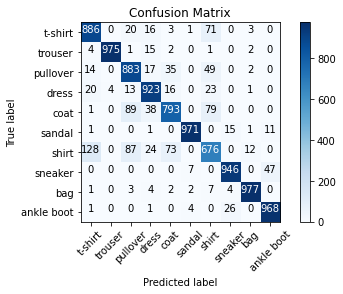

In [135]:
plot_confusion_matrix(cm, classes)

Text(0.5, 1.0, 'True label: coat, Predicted: pullover')

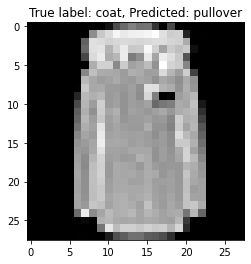

In [136]:
# show misclassified example
misclassified_idx = np.where(y_hat != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title(f'True label: {classes[y_test[i]]}, Predicted: {classes[y_hat[i]]}')

## CIFAR-10 + Data Augmentation

In [137]:
# downlaod data
data = tf.keras.datasets.cifar10.load_data()

In [138]:
# extract data
(X_train, y_train), (X_test, y_test) = data

In [139]:
# convert range from (0, 255) to (0, 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [140]:
# flatten target variable to a 1D array
y_train = y_train.flatten()
y_test = y_test.flatten()

In [141]:
print(X_train.shape)

(50000, 32, 32, 3)


In [142]:
# store number of possible classes
K = len(set(y_train))
print('Number of possible classes', K)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Number of possible classes 10


### CNN Model

In [166]:
# build model, inspiration from the VGG network
i = Input(shape=X_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)  # Not very useful, we lose information

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)  # Not very useful, we lose information

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)  # Not very useful, we lose information

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [167]:
# Print a summary of the model
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0   

In [168]:
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [169]:
# fit model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 249s 159ms/step - loss: 1.2814 - accuracy: 0.5576 - val_loss: 0.9508 - val_accuracy: 0.6709
Epoch 2/50
1563/1563 [==============================] - 1542s 987ms/step - loss: 0.8459 - accuracy: 0.7065 - val_loss: 0.8159 - val_accuracy: 0.7199
Epoch 3/50
1563/1563 [==============================] - 175s 112ms/step - loss: 0.6840 - accuracy: 0.7635 - val_loss: 0.7139 - val_accuracy: 0.7611
Epoch 4/50
1563/1563 [==============================] - 175s 112ms/step - loss: 0.5807 - accuracy: 0.8015 - val_loss: 0.7407 - val_accuracy: 0.7586
Epoch 5/50
1563/1563 [==============================] - 175s 112ms/step - loss: 0.4942 - accuracy: 0.8308 - val_loss: 0.6151 - val_accuracy: 0.8015
Epoch 6/50
1563/1563 [==============================] - 170s 109ms/step - loss: 0.4268 - accuracy: 0.8536 - val_loss: 0.7454 - val_accuracy: 0.7692
Epoch 7/50
1563/1563 [==============================] - 166s 106ms/step - loss: 0.3590 - accuracy: 0.8757 - val

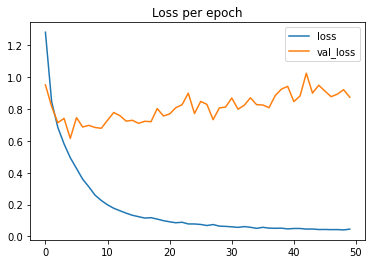

In [170]:
# plot loss per epoch
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('Loss per epoch')
plt.legend()

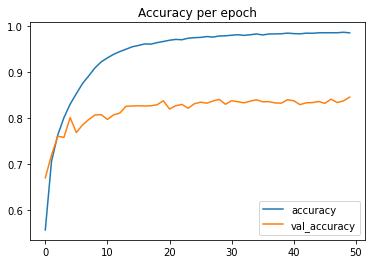

In [171]:
# plot accuracy per epoch
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy per epoch')
plt.legend()

### Analyze Model

In [172]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.8738 - accuracy: 0.8462


[0.8738025426864624, 0.8461999893188477]

In [173]:
# Calculate confusion matrix
y_hat = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_hat)

Confusion matrix, without normalization
[[855  10  40   9  10   2   9   5  44  16]
 [  9 910   0   3   1   3   4   0  24  46]
 [ 40   1 780  27  61  32  32  10   9   8]
 [ 18   5  63 676  55 103  37  18   9  16]
 [  8   2  43  25 861  22  18  13   5   3]
 [  6   1  47  93  32 778  14  23   1   5]
 [  5   3  30  36  28   8 879   3   4   4]
 [  7   0  14  23  58  12   4 867   6   9]
 [ 22   7   8   2   4   2   2   2 934  17]
 [ 14  32   2   4   2   2   3   2  17 922]]


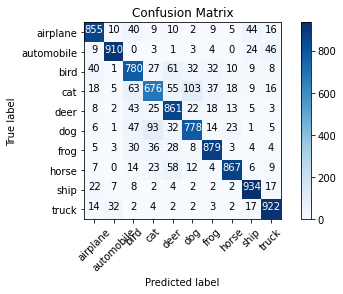

In [174]:
plot_confusion_matrix(cm, classes)

Text(0.5, 1.0, 'True label: cat, Predicted: truck')

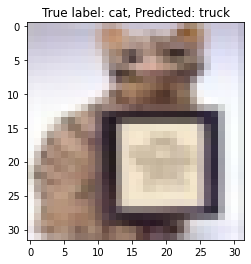

In [175]:
# show misclassified example
misclassified_idx = np.where(y_hat != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i])
plt.title(f'True label: {classes[y_test[i]]}, Predicted: {classes[y_hat[i]]}')

In [ ]:
def function(a, b, c):